Let's see how we can plot the shots positions on a pitch !

We'll use mplsoccer for this

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [16]:
df = pd.read_csv("ligue1shot.csv")

In [93]:
# team = name of the team
# home_away = if you want home or away goals
# home_away should be "h_team" for home, "a_team" for away
# pitch_color = color you want for the pitch can be "grass", "black" any color or hex value
# marker_color = color of the marker
# title color will be black by default
def plot_shots(df, team, home_away, pitch_color, marker_color, title_color="black"):
    
    # df for the selected team
    df_team = df[df[home_away] == team]
    # select only goals
    df_team = df_team[df_team["result"] == "Goal"]
    
    # choose home or away
    if home_away == "h_team":
        df_team = df_team[df_team["h_a"] == "h"]
    elif home_away == "a_team":
        df_team = df_team[df_team["h_a"] == "a"]
        
    # pitch is 120x80 
    df_team["X"] = df_team["X"].apply(lambda x: x*120)
    df_team["Y"] = df_team["Y"].apply(lambda x: x*80)
    
    # set size
    fig, ax = plt.subplots(figsize=(15,12))

    # create pitch
    # orientation can be "horizontal" or "vertical"
    # goal_type set the style of the goal
    # half = True if you want only half of the pitch
    # axis & label = True if you want to show axis and labels
    pitch = Pitch(orientation="horizontal", pitch_color=pitch_color, line_color="white", 
                  goal_type="box", half=False, axis=False, label=False)

    # draw the pitch
    pitch.draw(ax=ax)

    # invert y axis
    plt.gca().invert_yaxis()

    # plot shot position for each goal
    # s = size, here : size is proportionnal to the xG value
    # alpha = opacity
    plt.scatter(df_team["X"], df_team["Y"], c=marker_color, s=df_team["xG"]*1000, alpha=0.7)
    
    if home_away == "h_team":
        game = "home"
    elif home_away == "a_team":
        game = "away"
        
    ax.text(x=60, y=82, s=f"{team}'s goals at " + game,
                  va='center', ha='center', color=title_color,
                  fontsize=25)
    
    return plt.show()

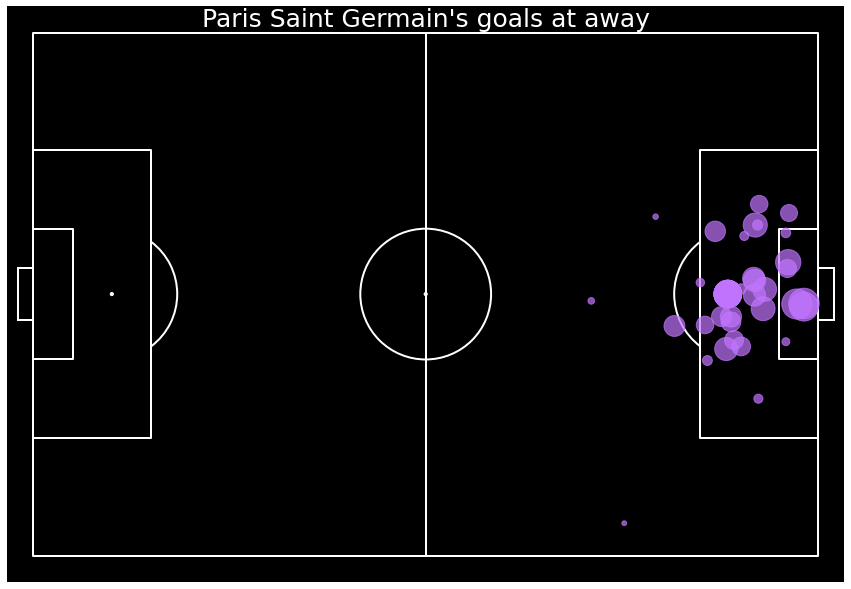

In [94]:
plot_shots(df, team="Paris Saint Germain", home_away="a_team", pitch_color="black", 
           marker_color="#c175ff", title_color="white")

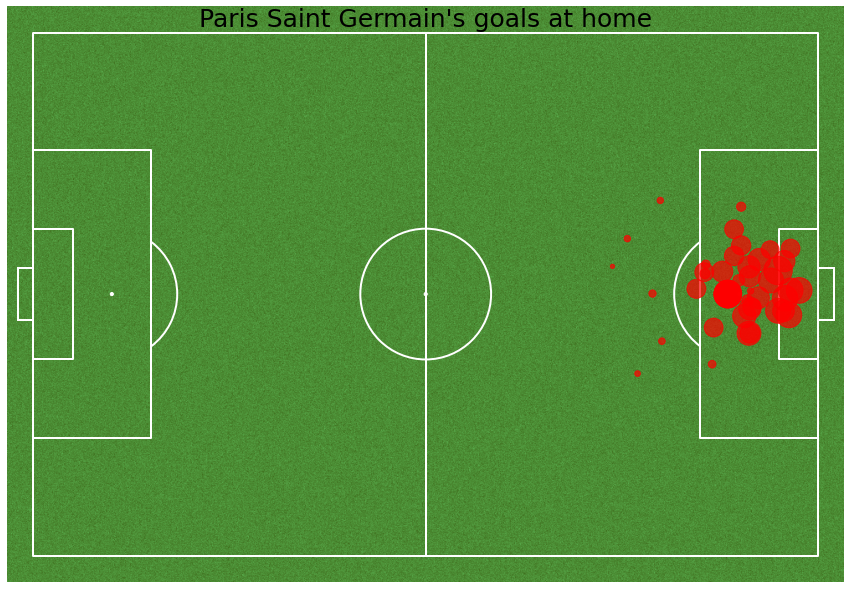

In [92]:
plot_shots(df, "Paris Saint Germain", "h_team", "grass", "red", "black")

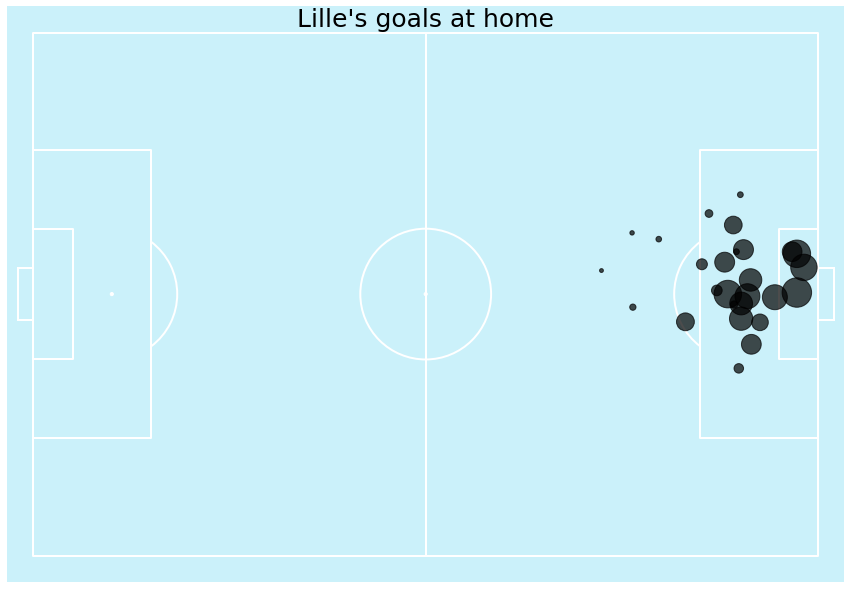

In [100]:
plot_shots(df, "Lille", "h_team", "#CBF1FA", "black")